 <h1>Smart Portfolios using Autoencoders<span class="tocSkip"></span></h1>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-instructions-and-information" data-toc-modified-id="Notebook-instructions-and-information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook instructions and information</a></span></li><li><span><a href="#Data-processing" data-toc-modified-id="Data-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data processing</a></span></li><li><span><a href="#Prepare-network-input-data" data-toc-modified-id="Prepare-network-input-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare network input data</a></span></li><li><span><a href="#Tools" data-toc-modified-id="Tools-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tools</a></span></li><li><span><a href="#Extrapolate-results-from-Deep-Learning-in-Finance" data-toc-modified-id="Extrapolate-results-from-Deep-Learning-in-Finance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Extrapolate results from Deep Learning in Finance</a></span><ul class="toc-item"><li><span><a href="#Feed-forward-autoencoder" data-toc-modified-id="Feed-forward-autoencoder-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Feed-forward autoencoder</a></span></li></ul></li><li><span><a href="#Autoencoder-feature-extraction" data-toc-modified-id="Autoencoder-feature-extraction-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Autoencoder feature extraction</a></span><ul class="toc-item"><li><span><a href="#Stacked-Autoencoder" data-toc-modified-id="Stacked-Autoencoder-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Stacked Autoencoder</a></span></li><li><span><a href="#Convolutional-Autoencoder" data-toc-modified-id="Convolutional-Autoencoder-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Convolutional Autoencoder</a></span></li><li><span><a href="#LSTM-Autoencoder" data-toc-modified-id="LSTM-Autoencoder-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>LSTM Autoencoder</a></span></li><li><span><a href="#Variational-autoencoder" data-toc-modified-id="Variational-autoencoder-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Variational autoencoder</a></span></li><li><span><a href="#Plot-performance-of-all-autoencoders-against-S&amp;P-500" data-toc-modified-id="Plot-performance-of-all-autoencoders-against-S&amp;P-500-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Plot performance of all autoencoders against S&amp;P 500</a></span></li></ul></li><li><span><a href="#LSTM-stock-price-forecasting" data-toc-modified-id="LSTM-stock-price-forecasting-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>LSTM stock price forecasting</a></span><ul class="toc-item"><li><span><a href="#Prepare-feature-input-data" data-toc-modified-id="Prepare-feature-input-data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Prepare feature input data</a></span><ul class="toc-item"><li><span><a href="#Extract-encoded-inputs" data-toc-modified-id="Extract-encoded-inputs-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Extract encoded inputs</a></span></li><li><span><a href="#Shape-encoded-inputs-and-create-target-data" data-toc-modified-id="Shape-encoded-inputs-and-create-target-data-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Shape encoded inputs and create target data</a></span></li></ul></li><li><span><a href="#Build-LSTM-predictor-model" data-toc-modified-id="Build-LSTM-predictor-model-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Build LSTM predictor model</a></span></li><li><span><a href="#Construct-portfolios" data-toc-modified-id="Construct-portfolios-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Construct portfolios</a></span></li><li><span><a href="#Visualise-portfolios-against-S&amp;P-500" data-toc-modified-id="Visualise-portfolios-against-S&amp;P-500-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Visualise portfolios against S&amp;P 500</a></span></li></ul></li><li><span><a href="#Bibliography" data-toc-modified-id="Bibliography-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bibliography</a></span></li><li><span><a href="#Acknowledgements" data-toc-modified-id="Acknowledgements-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Acknowledgements</a></span></li></ul></div>

# Notebook instructions and information
1. This is just a walkthrough of the code used to obtain results. Please refer to the report titled __ST449_Final.pdf__ for the full write-up. It can be found in the GitHub repo. This notebook does, however, contain some plots that are not found in the write-up as it was not possible to include all plots there.
2. All data and code is in this repo. Here is a quick breakdown of where relevant notebooks can be found:
    - data/: stock_df contains all financial information, symbols contains the tickers for each stock, CompanyHolder.py extracts the current S&P 500 companies and the remaining .ipynb files fetch the required dataframes and shape them into a format that is almost ready to be fed into the neural networks
    - hyper_stacked, hyper_vae...: these folders contain results from performing grid searches to obtain optimal hyperparameters for the autoencoders
3. The notebook will run as is provided you set 'st449-project-2020-LSEDev' as the working directory and install the relevant modules.
4. Processing the data requires a paid Tiingo subscription plus the fundamental add-on. I have left my API key in the relevant scripts in case you need to run them - please let me know before you do so as I will have to reinstate my subscription. Please keep in mind that the data will differ from the output in this notebook as it will obtain the most recent 3 years of data from when the code is run. I have included the data (in csv form) used in this analysis in the repo if you would like to replicate the results I obtained.
5. I use the functional API instead of the sequential API for the necessary flexibility when building these networks.
6. Training neural networks using GPUs is typically faster than using a CPU when input data is considerably large and the model has millions of parameters (eg. text or image classification). However, for smaller models, it is often faster to train the networks using a CPU. The models in this notebook do not exceed 1 million parameters (except the LSTM models which are larger than the rest) and so I would suggest using a CPU. However, if you would prefer to use a GPU which is useful for the LSTM models, I have included a cell below that allows the notebook to run from Google Colab provided the repo is stored on Google Drive. See this [link](https://datascience.stackexchange.com/questions/19220/choosing-between-cpu-and-gpu-for-training-a-neural-network) for more details on when CPUs are preferred to GPUs for training networks.
7. Due to the randomness present in neural network training (initialisations, dropout etc.), results can differ each time the experiments are repeated. However, after training the networks several times, I use results that were obtained most frequently and base analysis on these observations. The plots included in this notebook are representative of results that occurred most frequently.

In [ ]:
# Run this cell if using Colab
# Restart the run time after running this cell and then run it 
# again to ensure the required packages have been installed and
# the correct file path has been set up
from google.colab import drive
drive.mount('/content/gdrive')
!pip install talos
%cd '/content/gdrive/My Drive/st449-project-2020-LSEDev/'

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import keras.backend as K
from keras import regularizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import talos
import glob

STOCK_DATA_PATH = 'data/stock_df/'

# pip install talos

# Data processing
This includes all scraping, cleaning and pivoting to obtain the cleaned data. This is all done in the data folder in this repo - please refer to the notebooks and scripts there for code.

# Prepare network input data
This section uses the dataframes from Section 2 and converts data into a form that can be fed directly into the neural network.

I first read in the required datasets and reshape them as required. I then build functions to perform the following steps:  
1. Normalise all data.
2. Create a dataset where training data consists of one particular stock's adjusted closing price split into windows of a chosen size - each window is an input. This is the obtain_per_share_data() function.
3. Create a dataset where each input consists of all stock's closing price for a particular day of trading. The input size will be the number of stocks in the index and the number of training samples will be the number of days of data on hand. This is the obtain_per_day_data() function. This is the dataset that will primarily be used for analysis.
4. Split the data into training and test data using a chosen proportion.

In [ ]:
# First, extract the DataFrames that were created in CreateRequiredDataFrames.ipynb
all_share_sp = pd.read_csv(STOCK_DATA_PATH + 'all_share_sp.csv', index_col='date', header=0)

# Daily adjusted closing price per share 
sp_per_day = pd.read_csv(STOCK_DATA_PATH + 'sp_per_day.csv', index_col='date', header=0)

# Aggregated data for S&P 500 index as a whole
agg_sp = pd.read_csv(STOCK_DATA_PATH + 'aggregated_sp.csv', index_col='date', header=0)


print('Number of companies used in analysis:', len(sp_per_day.columns))

print('\nAll information for all stocks over all dates')
display(all_share_sp.head(2))
print('\nAdjusted daily closing price for all stocks over all dates')
display(sp_per_day.head(2))
print('\nAggregated daily S&P 500 market information (I have left all columns here but only the market cap column is particularly useful)')
display(agg_sp.head(2))

In [3]:
# Prepare inputs and outputs - the functions below will process input to be fed straight into the network

def normalise(x):
    '''Normalise all values in each shares input data using a min max scaler'''
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

def obtain_per_share_data(ticker, test_size, shuffle=True):
    '''Extracts training and test data with a given split - inputs are all one share where each
    data point is a window of adjusted closing share prices.'''
    # Below is a list of the market caps for an individual share over the dates in all_share_sp
    each_growth = all_share_sp[all_share_sp['ticker']==ticker]['growth'].to_numpy()
    dates = all_share_sp[all_share_sp['ticker']==ticker].index.to_numpy()
    dates = [i[:10] for i in dates]
    reshaped_dates = np.array(dates).reshape(-1,10)

    nrmlzd_growth = normalise(each_growth)
    growths = nrmlzd_growth.reshape(-1,10)
    growths_with_dates = list(zip(reshaped_dates, growths))
    x_train_with_dates, x_test_with_dates = train_test_split(growths_with_dates, 
                                                             test_size=test_size,
                                                             shuffle=shuffle)
    
    # Data is shuffled when splitting between training and test sets so the below is done to ensure
    # I know the dates that corresponds to respective growth values
    x_train = np.array([growth for date, growth in x_train_with_dates])
    x_train_dates = np.array([date for date, growth in x_train_with_dates])
    x_test = np.array([growth for date, growth in x_test_with_dates])
    x_test_dates = np.array([date for date, growth in x_test_with_dates])
    
    return (x_train, x_train_dates), (x_test, x_test_dates)

def obtain_per_day_data(test_size, shuffle=True):
    '''Extracts training and test data with a given split - each data point consists of 
    all stocks' adjusted closing share prices for a given day'''
    # Below is a list of the market caps for an individual share over the dates in all_share_sp
    dates = sp_per_day.index.to_numpy()
    dates = [i[:10] for i in dates]
    
    all_prices = normalise(sp_per_day.to_numpy())
    
    prices_with_dates = list(zip(dates, all_prices))
    
    x_train_with_dates, x_test_with_dates = train_test_split(prices_with_dates, 
                                                             test_size=test_size,
                                                             shuffle=shuffle)
    
    # Data is shuffled when splitting between training and test sets so the below is done to ensure
    # I know the dates that corresponds to respective growth values
    x_train = np.array([price for date, price in x_train_with_dates])
    x_train_dates = np.array([date for date, price in x_train_with_dates])
    x_test = np.array([price for date, price in x_test_with_dates])
    x_test_dates = np.array([date for date, price in x_test_with_dates])
    
    return (x_train, x_train_dates), (x_test, x_test_dates)

Below I plot adjusted closing share price, daily growth and normalised log daily growth for Apple. This is just to give an idea of what each measure used in analysis looks like. I mainly used normalised adjusted closing price to train the networks.

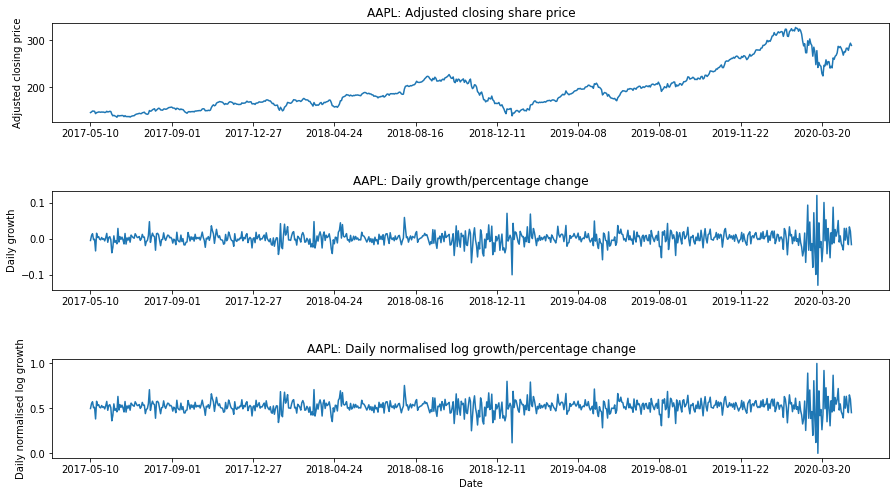

In [4]:
def plot_share_price(ticker):
    '''Plots share price for a particular stock'''
    each_growth = all_share_sp[all_share_sp['ticker']==ticker]['growth'].to_numpy()
    dates = all_share_sp[all_share_sp['ticker']==ticker].index.to_numpy()
    dates = [i[:10] for i in dates]
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,8))
    plt.subplots_adjust(hspace=0.7)
    
    ax1.plot(dates, all_share_sp[all_share_sp['ticker']==ticker]['adjClose'].to_numpy())
    ax1.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax1.set_title(ticker + ": Adjusted closing share price")
    ax1.set_ylabel('Adjusted closing price')
    
    ax2.plot(dates, all_share_sp[all_share_sp['ticker']==ticker]['growth'].to_numpy())
    ax2.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax2.set_title(ticker + ": Daily growth/percentage change")
    ax2.set_ylabel('Daily growth')
    
    nrmlzd_growth = normalise(each_growth)
    ax3.plot(dates, nrmlzd_growth)
    ax3.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax3.set_title(ticker + ": Daily normalised log growth/percentage change")
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Daily normalised log growth')

plot_share_price('AAPL')

# Tools
This sections contains functions for a variety of purposes. I keep them in this notebook because they are dependent on the data in previous sections - it would not make sense to store them in a separate scipt. These functions are used throughout the notebook.

In [734]:
def bound_accuracy(y_true, y_pred):
    '''This function defines a new metric for measuring network prediction accuracy.
    If the predicted y value is within a range of the true y, it is considered
    an accurate prediction, else it is inaccurate. The metric returns the
    proportion of accurate predictions.'''
    threshold = 0.01 # I use this threshold for all analysis
    diff = tf.math.abs(y_pred - y_true)
    mask = K.less(diff, threshold)  # element-wise True where y_pred < y_pred
    mask = K.cast(mask, K.floatx())  # cast to 0.0 / 1.0

    return K.mean(mask)

def find_portfolio_returns(stock_portfolio_w_weights, lstm_predictions=False):
    '''Calculates the daily return of a portfolio with given stocks and weightings
    and uses this information to show the how the portfolio grows over time if the 
    same value as the initial S&P 500 was invested at the same time.
    Takes two parameters:
    1. Tuple of the stock tickers (which form a portfolio) and their corresponding weights
    2. lstm_predictions: used to initialise the portfolio for the last section in this notebook
    Returns the portfolio value at each date.'''
    
    new_portfolio = all_share_sp[all_share_sp['ticker'] \
                                 .isin(stock_portfolio_w_weights[0])][['ticker','growth']] 
    new_portfolio = pd.pivot_table(new_portfolio ,values='growth',index=['date','ticker'])

    weights_df = pd.DataFrame(stock_portfolio_w_weights[1],
                              index = stock_portfolio_w_weights[0],
                              columns = ['weight'])
    weights_df.index.name = 'ticker'

    new_portfolio = new_portfolio.join(weights_df)
    new_portfolio['weighted_return'] = new_portfolio['growth']*new_portfolio['weight']
    new_portfolio = new_portfolio.groupby(level=0).sum()
    new_portfolio['weighted_return'] += 1
    
    # For lstm predictions later on, we only look at performance for the test dates
    # and hence we initialise the S&P and portfolio value at the same amount on the
    # first test day
    if lstm_predictions:
        new_portfolio = new_portfolio.loc['2019-09-26 00:00:00+00:00':]
        new_portfolio['cum_return'] = new_portfolio.weighted_return.cumprod()
        init_sp_val = agg_sp.loc['2019-09-26 00:00:00+00:00'].marketCap
    
    else:
        new_portfolio['cum_return'] = new_portfolio.weighted_return.cumprod()
        init_sp_val = agg_sp.iloc[0].marketCap
    
    new_portfolio['portfolio_value'] = init_sp_val*new_portfolio['cum_return']
    
    if lstm_predictions:
        new_portfolio.at['2019-09-26 00:00:00+00:00','portfolio_value'] = init_sp_val
    
    else:
        new_portfolio.at['2017-05-10 00:00:00+00:00','portfolio_value'] = init_sp_val
    
      
    return new_portfolio.portfolio_value.values
    
def plot_fit_metrics(history, num_epochs):
    '''Plots errors and metrics (train and test loss, bound accuracy, mae) for a given number of epochs
    for each error or metric'''
    fig, ax = plt.subplots(2, 2, figsize=(8,6))
    ax[0][0].plot(history.history["loss"][:num_epochs[0]])
    ax[0][0].set_title("Train loss")
    ax[0][1].plot(history.history["val_loss"][:num_epochs[1]])
    ax[0][1].set_title("Test loss")
    ax[1][0].plot(history.history["bound_accuracy"][:num_epochs[2]])
    ax[1][0].set_xlabel('Epochs')
    ax[1][0].set_title("Bound Accuracy")
    ax[1][1].plot(history.history['mean_absolute_error'][:num_epochs[3]])
    ax[1][1].set_title("Mean Absolute Error")
    ax[1][1].set_xlabel('Epochs')
    plt.subplots_adjust(hspace=0.4)
    plt.subplots_adjust(wspace=0.7)
    
def optimal_hyperparameters(grid_df, vae=False, conv=False):
    '''Takes results from running the grid search and returns a dictionary with
    the optimal hyperparameters to be used for fitting the autoencoder'''
    params = grid_df.iloc[grid_df['loss'].argmin()]
    if vae:
        p = {'activation': params.activation,
         'optimizer': params.optimizer,
         'batch_size': params.batch_size,
         'epochs': params.epochs}
    elif conv:
        p = {'activation': params.activation,
         'optimizer': params.optimizer,
         'batch_size': params.batch_size,
         'epochs': params.epochs,
         'kernel_size': [params.kernel_size],
         'losses': params.losses}               
    else:
        p = {'activation': params.activation,
         'optimizer': params.optimizer,
         'losses': params.losses,
         'batch_size': params.batch_size,
         'epochs': params.epochs}
    
    return p

def info_content_and_portfolio_performance(model, data, n, weights, x_train_dates,
                                           info_content=False, conv=False, lstm=False):
    '''Calculates the n highest information stocks proposed by a trained autoencoder and plots their
    portfolio performance against the S&P 500 as a whole. Data to the right of the green line is
    test data. Also plots the information content of all stocks if specified.
    Takes the following parameters:
    model: A trained model
    data: Any given data
    n: The number of highest info stocks to be included in the portfolio
    weights: The portfolio weights of each stocks (stocks are ranked from highest to lowest so the
    first weight in the given list will be the weight for the highest info stock)
    x_train_dates: The dates over which the model was trained.
    info_content: plots information content if specified.
    conv: user must specify if the function is to be run on a convolutional autoencoder
    lstm: user must specify if the function is to be run on an lstm autoencoder
    '''
    # Information content is considered high if a shares input is almost the same as its 
    # autoencoded output
    predictions = model.predict(data)
    if conv:
        mae_per_share = np.abs(data-predictions).mean(axis=0).flatten()
    elif lstm:
        mae_per_share = np.abs(data-predictions).reshape(-1,479).mean(axis=0)
    else:     
        mae_per_share = np.abs(data-predictions).mean(axis=0)
        
    smallest_error_index = np.argsort(mae_per_share)
    
    
    # Plot market cap of all shares (S&P 500) on the same graph
    sp_daily_mcap = np.zeros(len(sp_per_day))
    for ticker in list(sp_per_day.columns):
        sp_daily_mcap += all_share_sp[all_share_sp['ticker']==ticker]['marketCap'].to_numpy()
        
    if info_content:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,10))
        
    else: 
        fig, ax1 = plt.subplots(1, 1, figsize=(10,4))
        
    dates = all_share_sp[all_share_sp['ticker']==ticker].index.to_numpy()
    dates = [i[:10] for i in dates]
    ax1.plot(dates, sp_daily_mcap, label='S&P 500')
    ax1.xaxis.set_major_locator(plt.MaxNLocator(9))
    ax1.set_title("Value of portfolio over specified date range")
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Portfolio value ($ trillions)')
    ax1.set_ylim(ymin=1e+13)

    # Plot portfolio of stocks with the most communal information
    # First calculate values
    highest_comm_stocks = sp_per_day.columns[smallest_error_index[:n]].tolist()
    print('Stocks with the most communal information:', highest_comm_stocks)
    stock_portfolio_w_weights = (highest_comm_stocks, weights)
    cml_portfolio_return = find_portfolio_returns(stock_portfolio_w_weights)
    # Now plot on the same graph as S&P 500
    ax1.plot(dates, cml_portfolio_return, label='High information stocks')
    last_train_date = x_train_dates[-1]
    ax1.axvline(last_train_date, color='g', linestyle='dashed', linewidth=1.5)
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(12,12))
    ax1.legend()
    
    if info_content:
        ax2.bar(range(len(mae_per_share)), mae_per_share[smallest_error_index])
        ax2.set_title("Mean absolute error per share")
        ax2.set_xlabel('Stock (ordered by mean absolute error)')
        ax2.set_ylabel('Mean absolute error')
        plt.subplots_adjust(hspace=0.3)
        
def plot_per_share_autoencoder(input_data, autoencoded_data):
    '''Plots original values and autoencoded values when the 
    input is a single share'''
    
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    ax.plot(input_data.flatten(), label = 'Actual growth')
    ax.plot(autoencoded_data.flatten(), label = 'Auto-encoded growth')
    ax.legend(fontsize='large')
    ax.set_title("Training normalised log growth for all daily values")
    ax.set_xlabel("Daily sample number")
    ax.set_ylabel("Normalised log growth")

# Extrapolate results from Deep Learning in Finance

This section extrapolates Smart Indexing from [Deep Learning in Finance](https://arxiv.org/pdf/1602.06561.pdf) (Section 4) to a more recent version of the S&P 500. I train an autoencoder on all shares on the S&P 500 and measure the decoded output's proximity to the actual market cap using mean absolute error (MAE). I proceed to rank shares by MAE from lowest to highest. I then take the 20 shares with the lowest MAE (highest information content) and compare their collective performance to that of the S&P 500 as a whole. The logic behind this is that shares with low MAE are easily reconstructed from the compressed encoding and are therefore high in information content. For this reason, they are a good representation of the index as a whole.
 
While this section utilises a fairly trivial model, it serves as motivation that autoencoders tend to capture features of stocks and thus provides a platform from which I can delve into more interesting variations on the subject. 

## Feed-forward autoencoder
This section trains a simple autoencoder. I train the adjusted closing share prices (after normalising them) seen in the first plot above. 

The below cell performs a grid search in order to find optimal hyperparameters. I show the results of the grid search for this example, but I omit displaying the grid search table for examples going forward. I will just report the optimal hyperparameters. 

To see a progress bar like the one below when training hyperparameters, set disable_progress_bar to False when using the scan function.

<img src="images/hyper_progress.png" width="400" height="200"/>

In [31]:
# Obtain data to be fed into neural network
(x_train, x_train_dates), (x_test, x_test_dates) = obtain_per_day_data(0.2, False)

def feedforward_auto(x_train, y_train, x_val, y_val, params):
    '''Train a feedforward auto encoder given training and validation data
    Returns the fitted autoencoder model and metrics of the training process'''
    encoding_dim=10
    input_stocks = Input(shape=(x_train.shape[1],)) 
    encoded = Dense(encoding_dim, activation=params['activation'], 
                    activity_regularizer=regularizers.l1(10e-8))(input_stocks) 
    decoded = Dense(y_train.shape[1], activation='sigmoid')(encoded)

    # Map an input to its reconstruction
    autoencoder = Model(input_stocks, decoded)

    # Map an input to its encoded version
    encoder = Model(input_stocks, encoded)

    # Map encoded version to a reconstruction
    encoded_input = Input(shape=(encoding_dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(encoded_input, decoder_layer(encoded_input))

    autoencoder.compile(optimizer=params['optimizer'], loss=params['losses'],
                        metrics=['mean_absolute_error', bound_accuracy])

    # Train the auto-encoder
    history = autoencoder.fit(x_train, y_train,
                    epochs=params['epochs'],
                    shuffle=True,
                    verbose=0,
                    batch_size=params['batch_size'],
                    validation_data=(x_val, y_val))

    return history, autoencoder


# Add some SGD optimisers with different momentums to the grid search 
momentum_optimisers = []
for val in [0.5, 0.7, 0.9]:
    momentum = tf.keras.optimizers.SGD(lr=0.001, momentum=val, decay=0., nesterov=False)
    momentum_optimisers.append(momentum)

# The parameters on which to perform the grid search 
p = {'activation':['relu', 'elu'],
     'optimizer': ['Nadam', 'Adam', 'RMSProp'] + momentum_optimisers,
     'losses': ['binary_crossentropy','mean_squared_error','mean_absolute_error'],
     'batch_size': [16, 32],
     'epochs': [400,800,1200]}


# Running Scan will compute fraction_limit (0.5 here) of all possible permutations 
# where 10% of the training data is used for validation
scan_object = talos.Scan(x_train, x_train, model=feedforward_auto, params=p, 
                         experiment_name='hyper_deep', fraction_limit=0.5, val_split=0.1,
                         disable_progress_bar=True, clear_session=False)

,round_epochs,loss,mean_absolute_error,bound_accuracy,val_loss,val_mean_absolute_error,val_bound_accuracy,activation,batch_size,epochs,losses,optimizer
0,800,0.154993,0.002363,0.969388,0.153707,0.002295,0.971260,relu,64,800,binary_crossentropy,RMSProp
1,400,0.454283,0.454283,0.000247,0.454802,0.454802,0.000313,relu,64,400,mean_absolute_error,<tensorflow.python.keras.optimizer_v2.gradient...
2,800,0.002003,0.002001,0.976484,0.001905,0.001903,0.978218,elu,64,800,mean_absolute_error,RMSProp
3,800,0.211145,0.457462,0.000247,0.211557,0.457981,0.000278,elu,128,800,mean_squared_error,<tensorflow.python.keras.optimizer_v2.gradient...
4,1200,0.456072,0.456072,0.000198,0.456601,0.456601,0.000278,relu,128,1200,mean_absolute_error,<tensorflow.python.keras.optimizer_v2.gradient...
...,...,...,...,...,...,...,...,...,...,...,...,...
103,1200,0.000048,0.003916,0.924302,0.000044,0.003675,0.932881,relu,64,1200,mean_squared_error,Nadam
104,1200,0.002500,0.002499,0.963441,0.002322,0.002321,0.969242,relu,128,1200,mean_absolute_error,RMSProp
105,400,0.003903,0.003902,0.919974,0.003607,0.003606,0.935769,relu,128,400,mean_absolute_error,RMSProp
106,400,0.156092,0.007582,0.762969,0.154832,0.007743,0.763918,elu,128,400,binary_crossentropy,Adam


Optimal hyperparameters: {'activation': 'elu', 'optimizer': 'RMSProp', 'losses': 'mean_squared_error', 'batch_size': 64, 'epochs': 800}


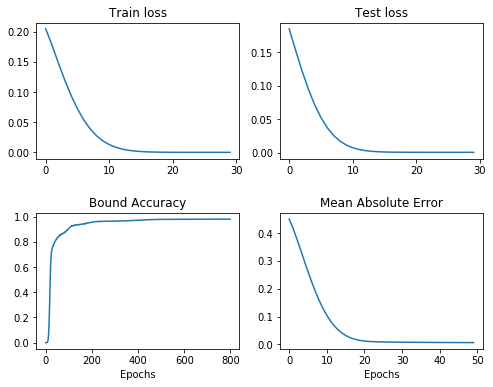

In [32]:
simple_auto_grid = pd.read_csv(glob.glob('hyper_deep/*')[0], index_col=None, header=0)

display(simple_auto_grid)

# Use the parameters with the lowest validation loss
simple_params = optimal_hyperparameters(simple_auto_grid)

print('Optimal hyperparameters:', simple_params)

# Train autoencoder using optimal parameters - validation results in this case refer
# to performance on the test set
history, autoencoder = feedforward_auto(x_train, x_train, x_test, x_test, simple_params)
plot_fit_metrics(history, [30]*2+[1000]+[50])

Stocks with the lowest scores are used to replicate the S&P 500 and their performance benchmarked against the S&P is shown in the first plot below. 

I show the ordered mean absolute error (descending information content) in the second graph below for this example but omit it for examples going forward.

Stocks with the most communal information: ['F', 'PBCT', 'HBAN', 'HST', 'HPE', 'NWSA', 'AES', 'BAC', 'RF', 'HPQ', 'FAST', 'CNP', 'KEY', 'FCX', 'JEF', 'FITB', 'KMI', 'WU', 'EXC', 'COG']


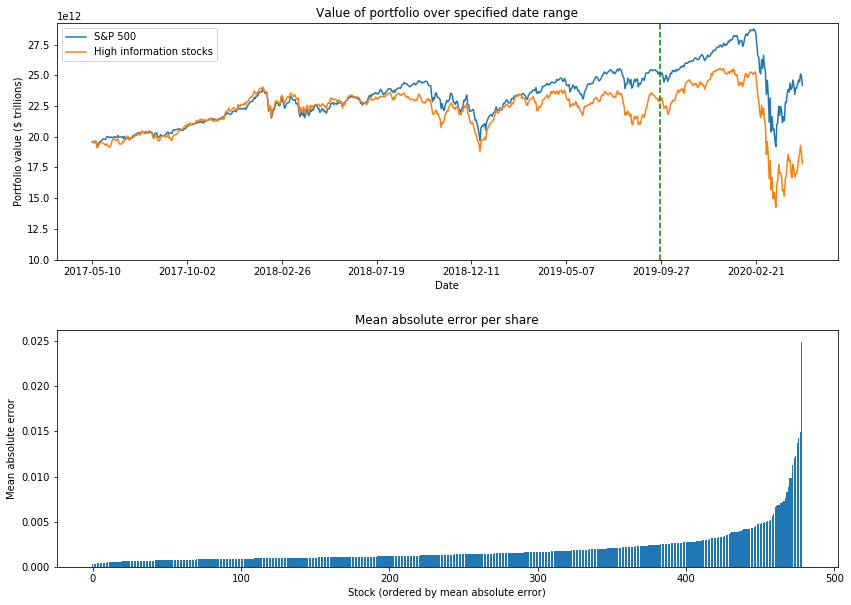

In [59]:
# Calculate the portfolio value of 20 shares with highest communal information as done 
# in Deep Learning in Finance

info_content_and_portfolio_performance(autoencoder, x_train, 20, [1/20]*20, x_train_dates, True)

# plt.savefig('images/basic_auto_encoder.png', dpi=600)

# Autoencoder feature extraction
This section follows on from the previous one by expanding the range of autoencoder architectures. I fit a variety of different model architectures in order to obtain the best results. 

## Stacked Autoencoder
The stacked autoencoder architecture is explained in the report. There is no need to tune hyperparameters when training each of the stacked layers as this makes little difference to results, however when combining each individual layer into the combined stacked model, I tune hyperparameters and use those giving the lowest loss when fitting the final model. 

In [64]:
(x_train, x_train_dates), (x_test, x_test_dates) = obtain_per_day_data(0.2, False)

def get_hidden_layer_output(model, x_train):
    '''Takes a trained model and returns predictions from running the training data
    through the first layer of the neural network. Each prediction will therefore
    have the same dimensions as the encoded layer.'''
    # Use Keras backend to obtain intermediate layer outputs
    get_1st_layer_output = K.function([model.layers[0].input],
                                      [model.layers[1].output])
    layer_output = get_1st_layer_output([x_train])[0]

    return layer_output

def train_single_layer_auto(input_train, encoding_dim, epochs=100, verbose=0):
    '''Trains a single layer autoencoder given input data and an encoding dimension.
    Returns the output of the middle hidden layer when running the data through 
    the trained model and the encoder layer to be reused in the stacked autoencoder.'''
    input_data = Input(shape=(input_train.shape[1],)) 
    encoded = Dense(encoding_dim, activation='relu', 
                    activity_regularizer=regularizers.l1(10e-8))(input_data) 
    decoded = Dense(input_train.shape[1], activation='sigmoid')(encoded)
    autoencoder = Model(input_data, decoded)
    autoencoder.compile(optimizer='adam', loss="mean_squared_error",
                    metrics=['mae'])
    history = autoencoder.fit(input_train, input_train,
                    epochs=epochs,
                    shuffle=True,
                    verbose=verbose,
                    batch_size = 32)

    encoder_output = get_hidden_layer_output(autoencoder, input_train)

    return encoder_output, autoencoder.layers[1]

def stacked_autoencoder(x_train, y_train, x_val, y_val, params):
    '''Train a stacked autoencoder. Returns the fitted stacked autoencoder model and
    a history of metrics obtained during the fitting process.'''
    encoding_dim=10

    #Layer 1
    encoder_l1_output, layer_1 = train_single_layer_auto(x_train, encoding_dim, 80)                                      

    #Layer 2
    encoder_l2_output, layer_2 = train_single_layer_auto(encoder_l1_output, encoding_dim-1, 800)  

    #Layer 3
    encoder_l3_output, layer_3 = train_single_layer_auto(encoder_l2_output, encoding_dim-2, 800)  

    #Layer 4
    encoder_l4_output, layer_4 = train_single_layer_auto(encoder_l3_output, encoding_dim-3, 800) 

    # Build the stacked autoencoder now that I have all the layers
    input_data = Input(shape=(x_train.shape[1],)) 
    l1 = layer_1(input_data)
    l2 = layer_2(l1)
    l3 = layer_3(l2)
    l4 = layer_4(l3)

    final_decoder = Dense(x_train.shape[1], activation='sigmoid')(l4)
    stacked_auto = Model(input_data, final_decoder)
    stacked_auto.compile(optimizer=params['optimizer'], loss=params['losses'],
                        metrics=['mae', bound_accuracy])
    stacked_history = stacked_auto.fit(x_train, y_train,
                    epochs=params['epochs'],
                    shuffle=True,
                    verbose=0,
                    batch_size=params['batch_size'],
                    validation_data=(x_val, y_val))

    return stacked_history, stacked_auto

# Add some SGD optimisers with different momentums to the grid search 
momentum_optimisers = []
for val in [0.5, 0.7, 0.9]:
    momentum = keras.optimizers.SGD(lr=0.001, momentum=val, decay=0., nesterov=False)
    momentum_optimisers.append(momentum)

stacked_p = {'activation':['relu', 'elu'],
     'optimizer': ['Adam', 'RMSProp'] + momentum_optimisers,
     'losses': ['binary_crossentropy','mean_squared_error','mean_absolute_error'],
     'batch_size': [64, 128],
     'epochs': [700,1000]}


stacked_scan_object = talos.Scan(x_train, x_train, model=stacked_autoencoder, params=stacked_p, 
                         experiment_name='hyper_stacked', fraction_limit=0.5, val_split=0.1,
                         disable_progress_bar=True, clear_session=False)

Optimal hyperparameters: {'activation': 'elu', 'optimizer': 'RMSProp', 'losses': 'mean_squared_error', 'batch_size': 128, 'epochs': 1000}


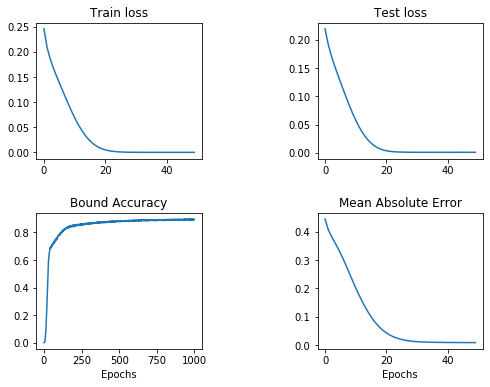

In [66]:
stacked_grid = pd.read_csv(glob.glob('hyper_stacked/*')[0], index_col=None, header=0)

stacked_params = optimal_hyperparameters(stacked_grid)

print('Optimal hyperparameters:', stacked_params)

# Train autoencoder using optimal parameters - validation results in this case refer
# to performance on the test set
stacked_history, stacked_auto = stacked_autoencoder(x_train, x_train, x_test, x_test, stacked_params)
plot_fit_metrics(stacked_history, [50]*2+[1000]+[50])

Stocks with the most communal information: ['AES', 'F', 'KMI', 'FAST', 'KIM', 'HBAN', 'HPE', 'FE', 'WU', 'CSCO', 'UAA', 'DRE', 'NWSA', 'NI', 'RF', 'HST', 'PBCT', 'BSX', 'IPG', 'MRO']


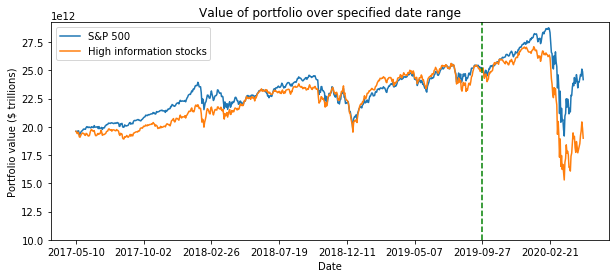

In [68]:
# Compare to S&P 500 
info_content_and_portfolio_performance(stacked_auto, x_train, 20, [1/20]*20, x_train_dates)

## Convolutional Autoencoder
Convolutional neural networks are frequently used to detect features primarily on image data. I fit a convolutional autoencoder on the financial data and observe its ability to successfully detect financial features.

In [34]:
(x_train, x_train_dates), (x_test, x_test_dates) = obtain_per_day_data(0.2, False)
# To ensure I get the same output shape as the input, I have to leave out three shares to make
# the input number divisible by 4. Also need to add an extra axis to the data so it can be fed
# to the convnet
x_train = x_train[:,:-3]
x_test = x_test[:,:-3]
conv_x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
conv_x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

def conv_auto(x_train, y_train, x_val, y_val, params):
    '''Train a convolutional auto encoder given training and validation data
    Returns the fitted autoencoder model and metrics of the training process.'''
    # Build encoder
    input_stocks = Input(shape=(conv_x_train.shape[1],1)) 
    conv_1 = Conv1D(filters=32, kernel_size=params['kernel_size'], # 20 dims
                    activation=params['activation'], padding="same")(input_stocks)
    # Apply a max pooling layer to extract the most prominent features - reduces encoding dim to 10
    pool_1 = MaxPooling1D(2, padding="same")(conv_1) # 10 dims
    conv_2 = Conv1D(filters=1, kernel_size=params['kernel_size'], # 10 dims
                    activation=params['activation'], padding="same")(pool_1)
    encoded = MaxPooling1D(2, padding="same")(conv_2) # 5 dims
    
    encoder = Model(input_stocks, encoded)
    
    # Build decoder    
    conv_3 = Conv1D(filters=1, kernel_size=params['kernel_size'], # 5 dims
                    activation=params['activation'], padding="same")(encoded)
    pool_3 = UpSampling1D(2)(conv_3) # 10 dims
    conv_4 = Conv1D(32, kernel_size=1,  activation=params['activation'])(pool_3) # 10 dims
    pool_4 = UpSampling1D(2)(conv_4) # 20 dims
    decoded = Conv1D(1, kernel_size=params['kernel_size'], # back to 1 filter
                     activation='sigmoid', padding='same')(pool_4) 
    
    conv_autoencoder = Model(input_stocks, decoded)
    
    conv_autoencoder.compile(optimizer=params['optimizer'], loss=params['losses'],
                        metrics=['mean_absolute_error', bound_accuracy])
    
    conv_history = conv_autoencoder.fit(x_train, y_train,
                    epochs=params['epochs'],
                    shuffle=True,
                    verbose=0,
                    batch_size=params['batch_size'],
                    validation_data=(x_val, y_val))

    return conv_history, conv_autoencoder

# Add some SGD optimisers with different momentums to the grid search 
momentum_optimisers = []
for val in [0.5, 0.7, 0.9]:
    momentum = tf.keras.optimizers.SGD(lr=0.001, momentum=val, decay=0., nesterov=False)
    momentum_optimisers.append(momentum)
    
# The parameters on which to perform the grid search 
conv_p = {'activation':['relu', 'selu'],
     'kernel_size':[3,5],
     'optimizer': ['Adam', 'RMSProp'] + momentum_optimisers,
     'losses': ['binary_crossentropy','mean_squared_error','mean_absolute_error'],
     'batch_size': [64, 128],
     'epochs': [400,800,1200]}

conv_scan_object = talos.Scan(conv_x_train, conv_x_train, model=conv_auto, params=conv_p, 
                         experiment_name='hyper_conv', fraction_limit=0.5, val_split=0.1,
                         disable_progress_bar=True, clear_session=False)

Optimal hyperparameters: {'activation': 'selu', 'optimizer': 'Adam', 'batch_size': 128, 'epochs': 1200, 'kernel_size': [5], 'losses': 'mean_squared_error'}
Model: "model_180"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_223 (InputLayer)       [(None, 476, 1)]          0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 476, 32)           192       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 238, 32)           0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 238, 1)            161       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 119, 1)            0         
_________________________________________________________________
conv1d_25 (Conv1D)           (Non

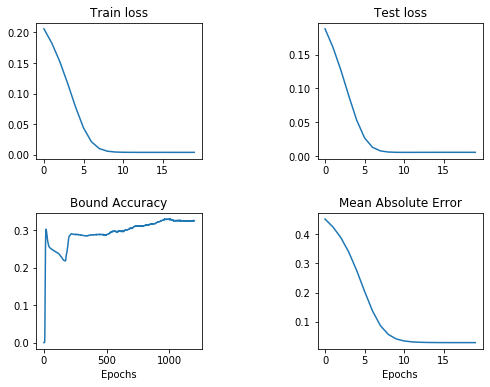

In [1094]:
conv_auto_grid = pd.read_csv(glob.glob('hyper_conv/*')[0], index_col=None, header=0)

# Use the parameters with the lowest validation loss
conv_params = optimal_hyperparameters(conv_auto_grid, conv=True)

print('Optimal hyperparameters:', conv_params)

# Train autoencoder using optimal parameters - validation results in this case refer
# to performance on the test set
convo_history, convo_auto = conv_auto(conv_x_train, conv_x_train, conv_x_test, conv_x_test, conv_params)
plot_fit_metrics(convo_history, [20,20,1200,20])
print(convo_auto.summary())

Stocks with the most communal information: ['MRO', 'AIV', 'K', 'AFL', 'DOV', 'NWL', 'PAYX', 'RL', 'JCI', 'XYL', 'MDT', 'DVA', 'PNR', 'BF.B', 'PKG', 'MAA', 'CF', 'CNP', 'AEE', 'INTC']


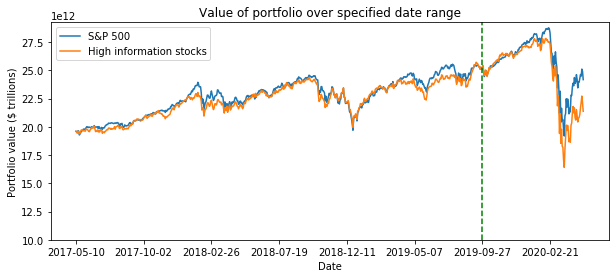

In [71]:
# Compare to S&P 500 FIX
info_content_and_portfolio_performance(convo_auto, conv_x_train, 20, [1/20]*20, x_train_dates, conv=True)

## LSTM Autoencoder
LSTM models are frequently used to capture temporal structures. Because the financial data is sequential in nature, it seems natural to try fit an LSTM to autoencoder on the data. Data is split into windows of 10 days before running data through the model. 

In [1038]:
timesteps = 10
(x_train, x_train_dates), (x_test, x_test_dates) = obtain_per_day_data(0.2, False)

x_train_lstm = []
x_test_lstm = []
for i in range(len(x_train)-10): 
    x_train_lstm.append(x_train[i:i+10, :])
    
for i in range(len(x_test)-10):
    x_test_lstm.append(x_test[i:i+10, :])

x_train_lstm, x_test_lstm = np.array(x_train_lstm), np.array(x_test_lstm)

def lstm_auto(x_train, y_train, x_val, y_val, params):
    '''Train an LSTM autoencoder given training and validation data
    Returns the fitted autoencoder model and metrics of the training process'''
    
    encoding_dim = 8

    inputs = Input(shape=(timesteps, x_train_lstm.shape[2]))
    encoded = LSTM(encoding_dim)(inputs)

    decoded = RepeatVector(timesteps)(encoded)
    decoded = LSTM(x_train_lstm.shape[2], return_sequences=True)(decoded) 

    lstm_autoencoder = Model(inputs, decoded, name='LSTM Autoencoder')
    encoder = Model(inputs, encoded)

    lstm_autoencoder.compile(optimizer=params['optimizer'], loss=params['losses'],
                                 metrics=['mean_absolute_error', bound_accuracy])
    lstm_history =  lstm_autoencoder.fit(x_train, y_train,
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    shuffle=True,
                    validation_data=(x_val, y_val),
                    verbose=0)
    
    return lstm_history, lstm_autoencoder


# Add some SGD optimisers with different momentums to the grid search 
momentum_optimisers = []
for val in [0.9]:
    momentum = tf.keras.optimizers.SGD(lr=0.001, momentum=val, decay=0., nesterov=False)
    momentum_optimisers.append(momentum)
    
# The parameters on which to perform the grid search 
lstm_p = {'activation':['relu', 'elu'],
             'optimizer': ['Adam', 'RMSProp'] + momentum_optimisers,
             'losses': ['binary_crossentropy','mean_squared_error'],
             'batch_size': [8, 16],
             'epochs': [1200,2400]}


lstm_scan_object = talos.Scan(x_train_lstm, x_train_lstm, model=lstm_auto, params=lstm_p, 
                         experiment_name='hyper_lstm', fraction_limit=0.5, val_split=0.1,
                         disable_progress_bar=True, clear_session=False)

Optimal hyperparameters: {'activation': 'elu', 'optimizer': 'Adam', 'losses': 'mean_squared_error', 'batch_size': 64, 'epochs': 1200}
Model: "LSTM Autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_222 (InputLayer)       [(None, 10, 479)]         0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 8)                 15616     
_________________________________________________________________
repeat_vector_116 (RepeatVec (None, 10, 8)             0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 10, 479)           935008    
Total params: 950,624
Trainable params: 950,624
Non-trainable params: 0
_________________________________________________________________
None


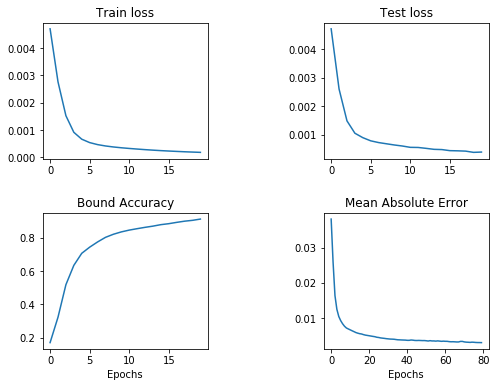

In [1090]:
lstm_auto_grid = pd.read_csv(glob.glob('hyper_lstm/*')[0], index_col=None, header=0)

# Use the parameters with the lowest validation loss
lstm_params = optimal_hyperparameters(lstm_auto_grid)

print('Optimal hyperparameters:',  lstm_params)

# Train autoencoder using optimal parameters - validation results in this case refer
# to performance on the test set
lstm_history, lstm_autoencoder = lstm_auto(x_train_lstm, x_train_lstm, x_test_lstm, x_test_lstm, lstm_params)
plot_fit_metrics(lstm_history, [20]*3 +[80])
print(lstm_autoencoder.summary())

Stocks with the most communal information: ['PBCT', 'AES', 'UDR', 'RF', 'SYMC', 'HPQ', 'FITB', 'BEN', 'KIM', 'MRO', 'MGM', 'IVZ', 'HBAN', 'FCX', 'KEY', 'KMI', 'EXC', 'JEF', 'LNT', 'NI']


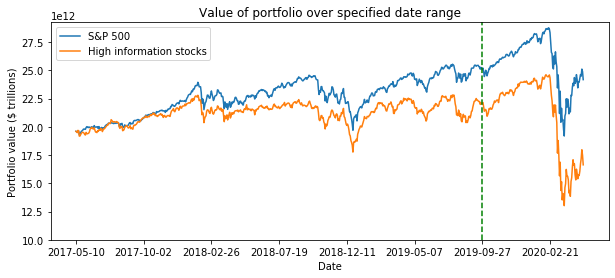

In [1092]:
# Compare to S&P 500 
info_content_and_portfolio_performance(lstm_autoencoder, x_train_lstm,
                                       20, [1/20]*20, x_train_dates, lstm=True)

## Variational autoencoder
A full description is given in the report but in short, a variational autoencoder has an encoder which encodes input samples into two parameters: $\bar{x}$ and $log(\sigma)$ representing a normal distribution. We then randomly sample from the distribution defined by these encoded parameters and map the sampled points back to the original inputs using a decoder.

In [119]:
(x_train, x_train_dates), (x_test, x_test_dates) = obtain_per_day_data(0.2, False)

def vae_auto(x_train, y_train, x_val, y_val, params):
    '''Fits a variational autoencoder on the data'''
    
    intermediate_dim = 150
    batch_size = params['batch_size']
    latent_dim = 10
    epochs = params['epochs']

    # Encoder step - map inputs to encoded variational parameters
    inputs = Input(shape=(x_train.shape[1],), name='encoder_input')
    x = Dense(intermediate_dim, params['activation'])(inputs)
    z_mean = Dense(latent_dim, name='z_mean')(x)
    z_log_sigma = Dense(latent_dim, name='z_log_sigma')(x)

    # Use the parameters created above to sample points from the latent space
    # Sampling method uses a reparameterization trick by sampling from an isotropic unit Gaussian
    def sampling(args):
        '''Takes mean and log variances and returns sampled latent vector'''
        z_mean, z_log_sigma = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        # By default, random_normal has mean = 0 and std = 1.0
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_sigma) * epsilon


    # Use reparameterization trick to push the sampling out as input
    # Note that "output_shape" isn't necessary with the TensorFlow backend
    z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_sigma])

    # Instantiate the encoder model
    encoder = Model(inputs, [z_mean, z_log_sigma, z], name='encoder')
    # encoder.summary()

    # Build the decoder model
    latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
    x = Dense(intermediate_dim, params['activation'])(latent_inputs)
    outputs = Dense(x_train.shape[1], activation='sigmoid')(x)

    # Instantiate the decoder model
    decoder = Model(latent_inputs, outputs, name='decoder')
    # decoder.summary()

    # Instantiate the VAE model - index of 2 represent the sampled z's - we dont want to decode 
    # z_mean or z_log_sigma
    outputs = decoder(encoder(inputs)[2])
    vae = Model(inputs, outputs, name='vae_mlp')
    
    # Custom loss included two losses - reconstruction term and a KL divergence regularisation term
    def vae_loss(x, x_decoded_mean):
        xent_loss = tf.keras.losses.binary_crossentropy(x, x_decoded_mean)
        kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
        return xent_loss + kl_loss

    vae.compile(optimizer=params['optimizer'], loss=vae_loss, metrics=['mae', bound_accuracy])

    vae_history = vae.fit(x_train, y_train,
            shuffle=True,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(x_val, y_val),
            verbose=0)
    
    return vae_history, vae

# Add some SGD optimisers with different momentums to the grid search 
momentum_optimisers = []
for val in [0.7, 0.9]:
    momentum = keras.optimizers.SGD(lr=0.001, momentum=val, decay=0., nesterov=False)
    momentum_optimisers.append(momentum)

vae_p = {'activation':['relu', 'elu'],
     'optimizer': ['Adam', 'RMSProp'] + momentum_optimisers,
     'batch_size': [32, 64],
     'epochs': [800,1200]}


vae_scan_object = talos.Scan(x_train, x_train, model=vae_auto, params=vae_p, 
                         experiment_name='hyper_vae', fraction_limit=0.5, val_split=0.1,
                         disable_progress_bar=True, clear_session=False)

Optimal hyperparameters: {'activation': 'relu', 'optimizer': 'Adam', 'batch_size': 32, 'epochs': 2000}


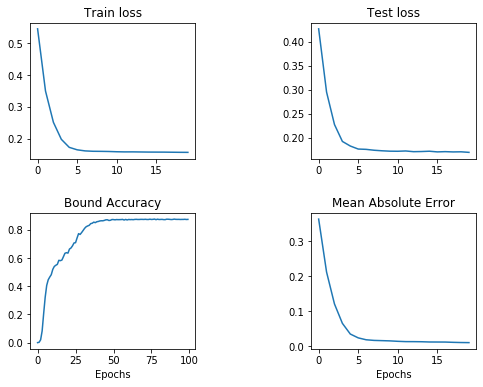

In [124]:
vae_grid = pd.read_csv(glob.glob('hyper_vae/*')[0], index_col=None, header=0)

vae_params = optimal_hyperparameters(vae_grid, vae=True)

print('Optimal hyperparameters:', vae_params)

# Train autoencoder using optimal parameters - validation results in this case refer
# to performance on the test set
vae_history, vae_autoencoder = vae_auto(x_train, x_train, x_test, x_test, vae_params)
plot_fit_metrics(vae_history, [20]*2+[100]+[20])

Stocks with the most communal information: ['F', 'HBAN', 'PBCT', 'WU', 'HST', 'HPE', 'NWSA', 'IPG', 'JNPR', 'KIM', 'KMI', 'KEY', 'CNP', 'WMB', 'HRB', 'RF', 'NI', 'HPQ', 'JEF', 'IRM']


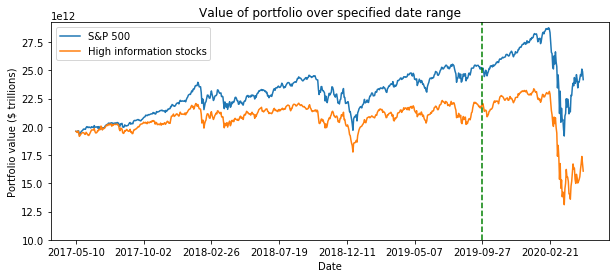

In [125]:
# Compare to S&P 500 
info_content_and_portfolio_performance(vae_autoencoder, x_train, 20, [1/20]*20, x_train_dates)

## Plot performance of all autoencoders against S&P 500
Instead of plotting all auto encoders on one plot, I use two plots to improve visualisation.

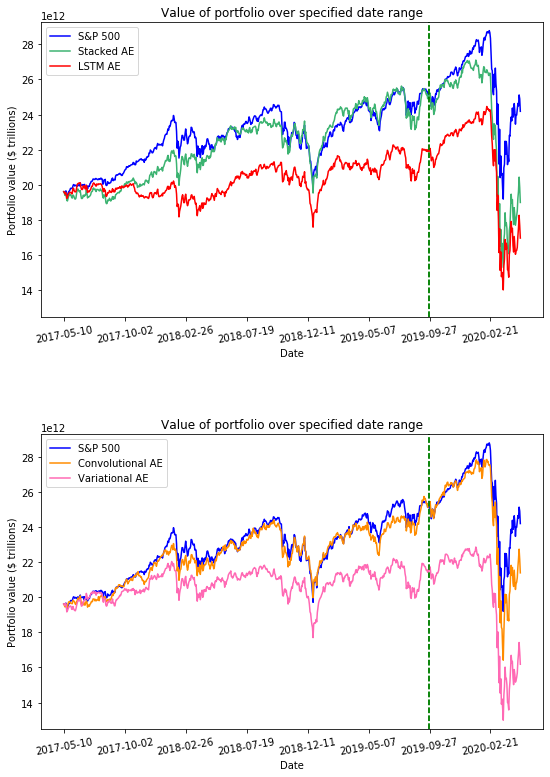

In [220]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(9,13))
plt.subplots_adjust(hspace=0.4)

# S&P 500 market cap
sp_daily_mcap = np.zeros(len(sp_per_day))
for ticker in list(sp_per_day.columns):
    sp_daily_mcap += all_share_sp[all_share_sp['ticker']==ticker]['marketCap'].to_numpy()

for axis in [ax1,ax2]:
    dates = all_share_sp[all_share_sp['ticker']==ticker].index.to_numpy()
    dates = [i[:10] for i in dates]
    axis.plot(dates, sp_daily_mcap, label='S&P 500', color='blue')
    axis.xaxis.set_major_locator(plt.MaxNLocator(9))
    axis.set_title("Value of portfolio over specified date range")
    axis.set_xlabel('Date')
    axis.set_ylabel('Portfolio value ($ trillions)')
    axis.set_ylim(ymin=1.25e+13)
    plt.sca(axis)
    plt.xticks(rotation=10)

# Add portfolios constructed from each autoencoder model
# This cell will only run if you have the autoencoder models from above saved into memory
legend_labels = ['Stacked AE', 'Convolutional AE',
                'LSTM AE', 'Variational AE']

for i, model in enumerate([stacked_auto, convo_auto, lstm_autoencoder, vae_autoencoder]): 
    if model==convo_auto:
        predictions = model.predict(conv_x_train)
        mae_per_share = np.abs(conv_x_train-predictions).mean(axis=0).flatten()
    elif model==lstm_autoencoder:
        predictions = model.predict(x_train_lstm)
        mae_per_share = np.abs(x_train_lstm-predictions).reshape(-1,479).mean(axis=0)
    else:     
        predictions = model.predict(x_train)
        mae_per_share = np.abs(x_train-predictions).mean(axis=0)

    axis=ax1
    colours = ['mediumseagreen', 'darkorange', 'red', 'hotpink']
    if i==1 or i==3:
        axis=ax2
        
        
    smallest_error_index = np.argsort(mae_per_share)
    highest_comm_stocks = sp_per_day.columns[smallest_error_index[:20]].tolist()
    stock_portfolio_w_weights = (highest_comm_stocks, [0.05]*20)
    cml_portfolio_return = find_portfolio_returns(stock_portfolio_w_weights)
    axis.plot(dates, cml_portfolio_return, colours[i], label=legend_labels[i] )
    last_train_date = x_train_dates[-1]
    axis.axvline(last_train_date, color='g', linestyle='dashed', linewidth=1.5)
    axis.ticklabel_format(style='sci', axis='y', scilimits=(12,12))
    axis.legend()
    
plt.savefig('images/ae_vs_sp.png', dpi=600)

# LSTM stock price forecasting
This section attempts to predict each stock price for all days in the two months following the last known stock price using an LSTM. The novel method I use is that instead of using adjusted closing share prices as inputs to the model, I use the encoded representation of stocks on each particular day as the input with the aim of improving performance by feeding in lower noise input data.

Stocks are predicted two months into the future. Stocks with the highest average expected growth over the period are selected.

## Prepare feature input data
The input data for this section consists of daily encoded features for all shares on the S&P restructured for the purpose of being fed into an LSTM model. The shape of the data is (samples, timesteps, features). I use a timestep of 60, a hyperparameter that has worked well with LSTM models in the past. The feature dimension is equal to the encoded dimension obtained from the respective autoencoders.

### Extract encoded inputs 
This cell below extracts the encoded inputs obtained from fitting all previous autoencoders. Below, it is important to specify the number/position of the encoding layer to get the correct encoded values. I look at a summary of each model to see which layer is the encoding layer.  

Another important observation is that I don't use the final 60 days of training data because this would require target adjusted closing prices for two months ahead which would have to be taken from the test data. Test data cannot be used during the training process.

In [504]:
def get_encoded_output(model, x_train, encoded_layer, stacked=False):
    '''Takes a trained model and returns predictions from running the training data
    until the specified layer of the neural network. Each prediction will therefore
    have the same shape as the encoded layer. User must specify if the model is a stacked
    autoencoder.'''
    # I use a slightly less efficient method for the stacked autoencoder because the
    # way the autoencoder was built led to a disconnected graph
    if stacked:
        input_data = Input(shape=(x_train.shape[1],)) 
        next_layer = input_data
        for layer in model.layers[:encoded_layer+1]:
            next_layer = layer(next_layer)

        sae_model = Model(input_data, next_layer)
        encoded_values = sae_model.predict(x_train)

    # Below is a cleaner method that can be used for all other models
    else:
        layer_output = model.layers[encoded_layer].output
        encoded_model = Model(inputs=model.input, outputs=layer_output)
        encoded_values = encoded_model.predict(x_train)
    
    return encoded_values

# For CAEs, the encoder outputs three dimensions for the encoded data - however, the channel dimension is 
# simply one so I remove this dimension
conv_ae_features = get_encoded_output(convo_auto, conv_x_train, 4).reshape(len(conv_x_train),-1)

# The VAE latent space consists of three outputs - z_mean, z_log_sigma and the sampled z values (which
# are the values that get decoded) therefore I take the sampled z values as the latent space using
# the index of 2 below
vae_ae_features = get_encoded_output(vae_autoencoder, x_train, 1)[2]

lstm_ae_features = get_encoded_output(lstm_autoencoder, x_train_lstm, 1)

# The fourth stacked layer is the last encoding layer hence the parameter below
stacked_ae_features = get_encoded_output(stacked_auto, x_train, 4, stacked=True)

### Shape encoded inputs and create target data
The cell below prepares encoded features to be fed into the LSTM and creates target data - target 
data will consist of normalised adjusted closing share prices for all shares up to 
n trading days ahead of the date of the latest corresponding input features. I have used n to keep these functions general but in the report, n=60 for all experiments.



In [994]:
def prediction_data(encoded_features, n):
    '''Takes two parameters:
    1. encoded_features: these are the features from the encoded data
    2. n: this is the number of days ahead the network will forecast 
    Returns training x and y values where the x values are the encoded features and the
    y values are the noramlised adjusted closing share prices'''
    x_train = []
    y_train = []
    x_val = []
    y_val = []
    (all_y_train, _), (all_y_val, _) = obtain_per_day_data(0.2, False)
    for i in range(60, len(encoded_features)-(n-1)): # use last 60 trading days features to predict data
        x_train.append(encoded_features[i-60:i, :])
        y_train.append(all_y_train[i:i+n, :])
        
    x_val.append(encoded_features[-60:, :]) # last 60 training points used to predict next n days of test data
    y_val.append(all_y_val[:n, :]) # first n test points to be predicted
    
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_val, y_val = np.array(x_val), np.array(y_val)

    return x_train, y_train, x_val, y_val

# Example to give a better understanding of input data
x_eg, y_eg, _, _ = prediction_data(vae_ae_features, 2)
print(x_eg.shape, y_eg.shape)
print('\nAbove, the training data has 539 samples each containing 60 days of data with 10 features\
(encoded stocks). The y data has the same number of samples but only has 2 days of data because \
in this case I specified that I wanted to predict 2 timesteps ahead. The features are equal to \
479 because that is the total number of stocks for which I want to predict the adjusted closing price.')

vae_x_train_lstm, vae_y_train_lstm, vae_x_val_lstm, vae_y_val_lstm = prediction_data(vae_ae_features, 60)
stacked_x_train_lstm, stacked_y_train_lstm, stacked_x_val_lstm, stacked_y_val_lstm = prediction_data(stacked_ae_features, 60)
lstm_x_train_lstm, lstm_y_train_lstm, lstm_x_val_lstm, lstm_y_val_lstm = prediction_data(lstm_ae_features, 60)
conv_x_train_lstm, conv_y_train_lstm, conv_x_val_lstm, conv_y_val_lstm = prediction_data(conv_ae_features, 60)

(539, 60, 10) (539, 2, 479)

Above, the training data has 539 samples each containing 60 days of data with 10 features(encoded stocks). The y data has the same number of samples but only has 2 days of data because in this case I specified that I wanted to predict 2 timesteps ahead. The features are equal to 479 because that is the total number of stocks for which I want to predict the adjusted closing price.


## Build LSTM predictor model
This section builds a function that fits an LSTM predictor model using encoded features obtained for all the different architectures (stacked, vae etc.). The cell below will train four different predictors (one for each autoencoder model) and will take around two hours to run.

In [ ]:
def lstm_prediction_model(x_train, y_train, x_val, y_val):
    '''Train an LSTM model to predict stock prices 60 timesteps ahead.'''    

    # Use a batch size of 1 so I don't have to get rid of any training data (stateful cells require the
    # batch number to divide perfectly into the training and testing samples)
    batch_size = 1 
    timesteps = x_train.shape[1]
    features = x_train.shape[2]
    num_stocks = y_train.shape[2]
    epochs = 20
    one_step_ahead_pred = False 
    
    inputs = Input(batch_shape=(batch_size, timesteps, features))
    
    # Number of hidden layer neurons specified in LSTM layers below have worked well in the past
    if one_step_ahead_pred: 
        y_train=y_train.reshape(-1,479) 
        l1 = LSTM(128, return_sequences=True, stateful=True, name='LSTM_layer_1', dropout=0.2)(inputs)
        l2 = LSTM(64, return_sequences=True, stateful=True, name='LSTM_layer_2', dropout=0.2)(l1)
        l3 = LSTM(32, return_sequences=False, stateful=True, name='LSTM_layer_3', dropout=0.2)(l2) 
        l4 = Dense(y_train.shape[1], activation='sigmoid')(l3)
        lstm_pred_model = Model(inputs, l4, name='LSTM_Predictor')
        lstm_pred_model.compile(optimizer='adam', loss='mse',
                                 metrics=['mean_absolute_error']) 

        
    else: # multi-step ahead forecasts - currently set to a 60 day forecast
        l1 = LSTM(32, return_sequences=True, stateful=True, name='LSTM_layer_1', dropout=0.5)(inputs)
        l2 = LSTM(16, return_sequences=True, stateful=True, name='LSTM_layer_2', dropout=0.5)(l1)
        l3 = TimeDistributed(Dense(num_stocks, activation='linear'))(l2)
        lstm_pred_model = Model(inputs, l3, name='LSTM_Predictor')
        lstm_pred_model.compile(optimizer='adam', loss='mse',
                                 metrics=['mean_absolute_error', bound_accuracy])
                   
    # Because I have declared stateful=True in all above layers, states have to be reset manually
    # There is a temporal relationship between all batches, but not between epochs so I reset the
    # state after every epoch
    for i in range(epochs):
        lstm_pred_model.reset_states()
        lstm_pred_model_history = lstm_pred_model.fit(x_train, y_train, batch_size=batch_size, epochs=1,
                                                      shuffle=False, validation_data=(x_val, y_val), verbose=0)

    return lstm_pred_model_history, lstm_pred_model

# Fit LSTM prediction models for encoded features from all autoencoder architectures
vae_predictor_model = lstm_prediction_model(vae_x_train_lstm, vae_y_train_lstm,
                          x_val=vae_x_val_lstm, y_val=vae_y_val_lstm)

conv_predictor_model = lstm_prediction_model(conv_x_train_lstm, conv_y_train_lstm,
                          x_val=conv_x_val_lstm, y_val=conv_y_val_lstm)


stacked_predictor_model = lstm_prediction_model(stacked_x_train_lstm, stacked_y_train_lstm,
                          x_val=stacked_x_val_lstm, y_val=stacked_y_val_lstm)

lstm_predictor_model = lstm_prediction_model(lstm_x_train_lstm, lstm_y_train_lstm,
                          x_val=lstm_x_val_lstm, y_val=lstm_y_val_lstm)

## Construct portfolios
This section uses an average growth metric described in the report to create a portfolio comprised of the stocks expected to perform best.

In [1078]:
def select_top_stocks(model, x_test, y_test):
    '''Looks at the predicted values of the normalised stock prices for each stock
    and selects stocks that are likely to grow the most.'''
    (all_y_train, _), (all_y_val, _) = obtain_per_day_data(0.2, False)
    last_y_train_stock_price = all_y_train[-1:] # most recent known stock price
    
    predictions = model.predict(x_test)
    # Reshape below assumes a prediction for one sample
    growths_from_last_known_price = (predictions-last_y_train_stock_price).reshape(predictions.shape[1], -1) 
    # Percentage growth from last known price
    pct_growth = growths_from_last_known_price/last_y_train_stock_price
    # Average predicted growths for the next n days taken from the last known price
    avg_growths = pct_growth.mean(axis=0)
    # Order highest expected average growth shares
    ordering = np.argsort(avg_growths)
    highest_growth_stocks = sp_per_day.columns[ordering[-20:]].tolist()
    
    return highest_growth_stocks

vae_portfolio = select_top_stocks(vae_predictor_model[1], vae_x_val_lstm, vae_y_val_lstm)
stacked_portfolio = select_top_stocks(stacked_predictor_model[1], stacked_x_val_lstm, stacked_y_val_lstm)
lstm_portfolio = select_top_stocks(lstm_predictor_model[1], lstm_x_val_lstm, lstm_y_val_lstm)
conv_portfolio = select_top_stocks(conv_predictor_model[1], conv_x_val_lstm, conv_y_val_lstm)

## Visualise portfolios against S&P 500

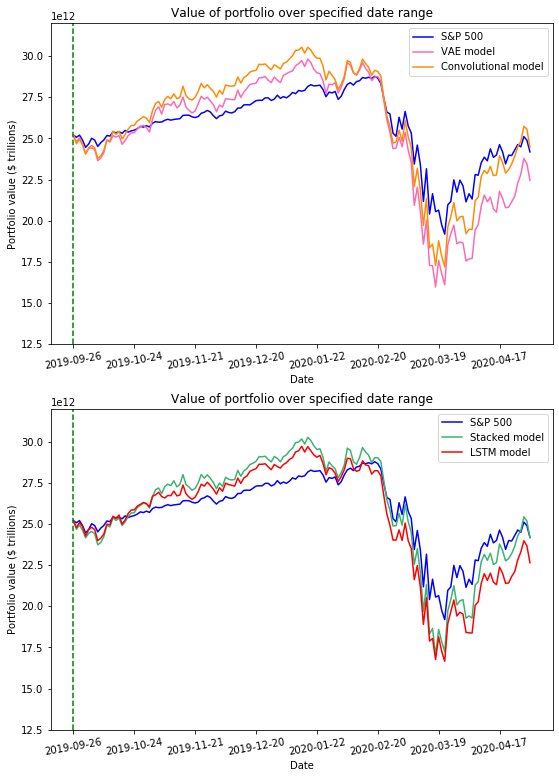

In [1085]:
# Plot suggested portfolios vs S&P
test_sp = sp_per_day.loc['2019-09-26 00:00:00+00:00':]
test_sp_daily_mcap = np.zeros(len(test_sp))
for ticker in list(test_sp.columns):
    test_sp_daily_mcap += all_share_sp[all_share_sp['ticker']==ticker]['marketCap'] \
                                        .loc['2019-09-26 00:00:00+00:00':].to_numpy()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9,13))

dates = all_share_sp[all_share_sp['ticker']==ticker].index.to_numpy()
dates = [i[:10] for i in dates][-len(test_sp_daily_mcap):]
ax1.plot(dates, test_sp_daily_mcap, label='S&P 500', color='blue')
ax1.xaxis.set_major_locator(plt.MaxNLocator(9))
ax1.set_title("Value of portfolio over specified date range")
ax1.set_xlabel('Date')
ax1.set_ylabel('Portfolio value ($ trillions)')
ax1.set_ylim(ymin=1.25e+13)  
ax1.set_ylim(ymax=3.2e+13)  

vae_cml_portfolio_return = find_portfolio_returns((vae_portfolio,[0.05]*20), lstm_predictions=True)
conv_cml_portfolio_return = find_portfolio_returns((conv_portfolio,[0.05]*20), lstm_predictions=True)
# Now plot portfolio on the same graph as S&P 500
ax1.plot(dates, vae_cml_portfolio_return, label='VAE model', color='hotpink')
ax1.plot(dates, conv_cml_portfolio_return, label='Convolutional model', color='darkorange')
last_train_date = x_train_dates[-1]
ax1.axvline(last_train_date, color='g', linestyle='dashed', linewidth=1.5)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(12,12))
ax1.legend()   
plt.sca(ax1)
plt.xticks(rotation=10)



ax2.plot(dates, test_sp_daily_mcap, label='S&P 500', color='blue')
ax2.xaxis.set_major_locator(plt.MaxNLocator(9))
ax2.set_title("Value of portfolio over specified date range")
ax2.set_xlabel('Date')
ax2.set_ylabel('Portfolio value ($ trillions)')
ax2.set_ylim(ymin=1.25e+13)  
ax2.set_ylim(ymax=3.2e+13)  

lstm_cml_portfolio_return = find_portfolio_returns((lstm_portfolio,[0.05]*20), lstm_predictions=True)
stacked_cml_portfolio_return = find_portfolio_returns((stacked_portfolio,[0.05]*20), lstm_predictions=True)
# Now plot portfolio on the same graph as S&P 500
# ax2.plot(dates, lstm_cml_portfolio_return, label='LSTM model')
ax2.plot(dates, stacked_cml_portfolio_return, label='Stacked model', color='mediumseagreen')
ax2.plot(dates, lstm_cml_portfolio_return, label='LSTM model', color='red')
last_train_date = x_train_dates[-1]
ax2.axvline(last_train_date, color='g', linestyle='dashed', linewidth=1.5)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(12,12))
ax2.legend()   
plt.sca(ax2)
plt.xticks(rotation=10)

# plt.savefig('images/lstm_predictive.png', dpi=600)

# Bibliography
I have included some auxiliary references that I used to build my code, models and evaluations. Please see references in the report for a formal list of primary sources I used.

http://github.com/autonomio/talos

https://github.com/keras-team/keras/blob/master/examples/variational_autoencoder.py


# Acknowledgements 
Thanks to Rishi Singh, the CEO of Tiingo, whose insight on corporate restructuring aided the validity of my analysis. 